GitHub<br>
https://github.com/LambdaLabsML/lambda-diffusers<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/lambda_diffusers_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

## GPU確認

In [1]:
!nvidia-smi

Mon Mar 20 12:26:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    33W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## GitHubからコード取得

In [2]:
%cd /content

!git clone https://github.com/LambdaLabsML/lambda-diffusers.git

# Commits on Dec 8, 2022
%cd /content/lambda-diffusers
!git checkout ef843a02cf0bc4e96c44a95fb3f65fa1939125b6

/content
Cloning into 'lambda-diffusers'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 331 (delta 50), reused 47 (delta 20), pack-reused 227
Receiving objects: 100% (331/331), 12.57 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (144/144), done.
/content/lambda-diffusers
Note: switching to 'ef843a02cf0bc4e96c44a95fb3f65fa1939125b6'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at ef843a0 Update README.md

## ライブラリのインストール

In [3]:
%cd /content/lambda-diffusers

# for lambdalabs/sd-pokemon-diffusers
!pip install diffusers==0.3.0
!pip install transformers==4.22.1 scipy==1.7.3 ftfy==6.1.1

# for lambda-diffusers
!pip install -r requirements.txt

/content/lambda-diffusers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.8/39.8 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [4]:
raise Exception("Please Restart RUNTIME")

Exception: ignored

## ライブラリのインポート

In [1]:
%cd /content/lambda-diffusers

from pathlib import Path
from lambda_diffusers import StableDiffusionImageEmbedPipeline
from PIL import Image
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"

/content/lambda-diffusers


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

# Image to Image

## 学習済みモデルのセットアップ

In [2]:
pipe = StableDiffusionImageEmbedPipeline.from_pretrained(
    "lambdalabs/sd-image-variations-diffusers",
    revision="273115e88df42350019ef4d628265b8c29ef4af5",)
pipe = pipe.to(device)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

## テスト画像のセットアップ

In [3]:
!rm -rf outputs
!rm -rf inputs
!mkdir outputs inputs

!wget -c https://casie.jp/media/wp-content/uploads/2020/09/Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Detroit.jpg \
      -O inputs/test_01.jpg

--2023-03-20 12:32:47--  https://casie.jp/media/wp-content/uploads/2020/09/Van_Gogh_Self-Portrait_with_Straw_Hat_1887-Detroit.jpg
Resolving casie.jp (casie.jp)... 52.69.239.119, 18.179.172.6
Connecting to casie.jp (casie.jp)|52.69.239.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 731557 (714K) [image/jpeg]
Saving to: ‘inputs/test_01.jpg’

inputs/test_01.jpg  100%[===================>] 714.41K  1.94MB/s    in 0.4s    

2023-03-20 12:32:48 (1.94 MB/s) - ‘inputs/test_01.jpg’ saved [731557/731557]



## Inference

In [4]:
input_img_path = "inputs/test_01.jpg"

im = Image.open(input_img_path)
num_samples = 2
image = pipe(num_samples*[im], guidance_scale=3.0)
image = image["sample"]

base_path = Path("outputs")
base_path.mkdir(exist_ok=True, parents=True)
for idx, im in enumerate(image):
  im.save(base_path/f"{idx:06}.jpg")

  0%|          | 0/51 [00:00<?, ?it/s]

## 結果表示

In [5]:
import cv2
from google.colab.patches import cv2_imshow

def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
  h_min = min(im.shape[0] for im in im_list)
  im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation) for im in im_list]
  
  return cv2.hconcat(im_list_resize)

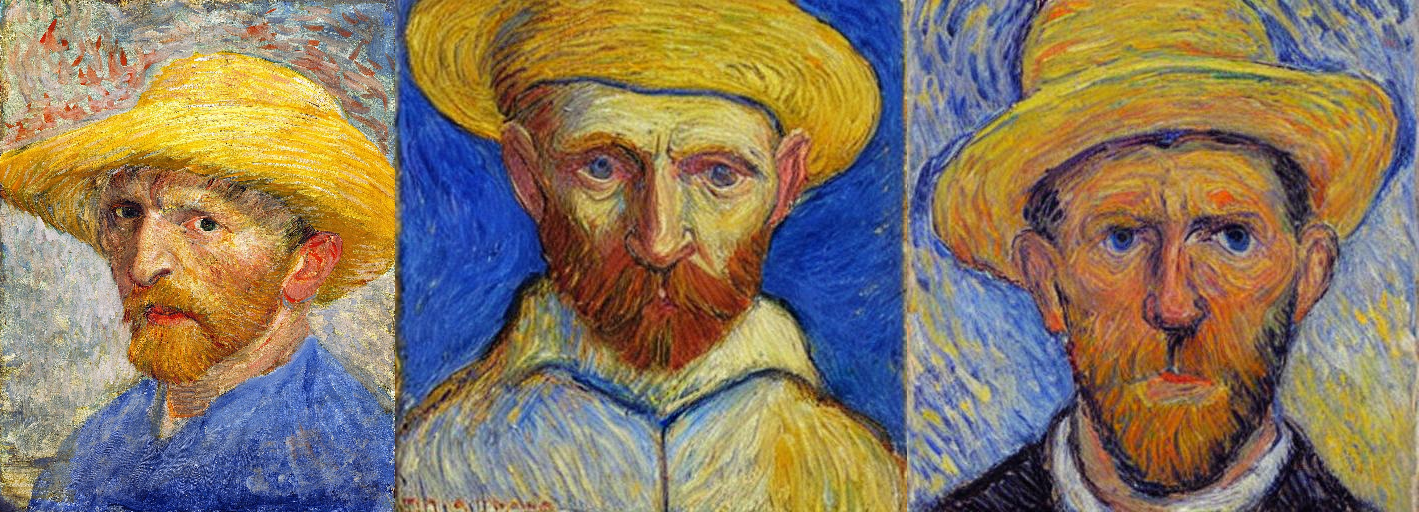

In [6]:
input_cv_im = cv2.imread(input_img_path)

im_h = None
for i in range(num_samples):
  cv_im = cv2.imread(f"outputs/{i:06}.jpg")
  
  if i == 0:
    im_h = hconcat_resize_min([input_cv_im, cv_im])
  else:
    im_h = cv2.hconcat([im_h, cv_im])

cv2_imshow(im_h)


# Pokemon Text to Image

## 学習済みモデルのセットアップ

In [7]:
pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

## Prompt

In [8]:
prompt = "harry potter snape" #@param {type:"string"}

In [9]:
# ガイダンススケール
scale = 10
# 生成枚数
n_samples = 3
disable_safety = True

## Inference

In [10]:
!rm -rf outputs_poke
!mkdir outputs_poke

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], guidance_scale=scale).images

for idx, im in enumerate(images):
  im.save(f"outputs_poke/{idx:06}.png")

  0%|          | 0/51 [00:00<?, ?it/s]

## 結果表示

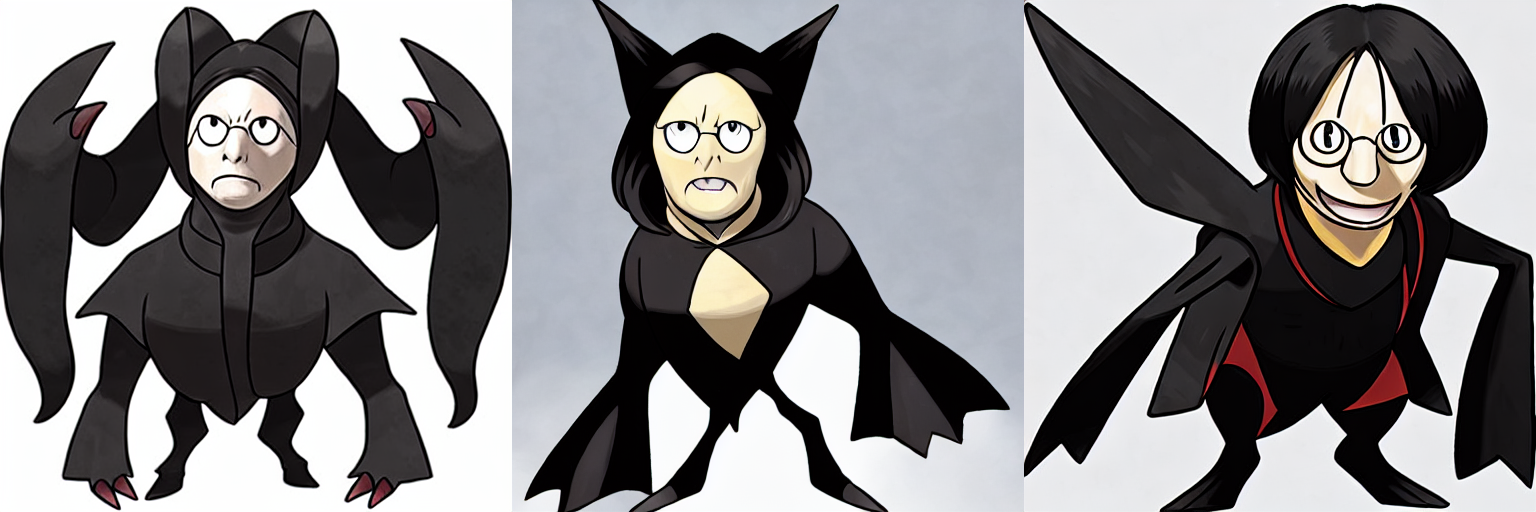

In [11]:
im_h = None
for i in range(n_samples):
  cv_im = cv2.imread(f"outputs_poke/{i:06}.png")
  
  if i == 0:
    im_h = cv_im
  else:
    im_h = cv2.hconcat([im_h, cv_im])

cv2_imshow(im_h)